In [1]:
import pandas as pd
import numpy as np

# Import Data

In [2]:
df=pd.read_csv('Train.csv')

In [3]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


# Data Cleaning

In [4]:
df=df.dropna()

In [5]:
df=df.drop(['ID','Var_1'],axis=1)

In [6]:
df.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Segmentation       0
dtype: int64

In [7]:
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,D
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
5,Male,Yes,56,No,Artist,0.0,Average,2.0,C
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0,C
...,...,...,...,...,...,...,...,...,...
8062,Male,Yes,41,Yes,Artist,0.0,High,5.0,B
8064,Male,No,35,No,Executive,3.0,Low,4.0,D
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,B


# Outlire Analysis

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


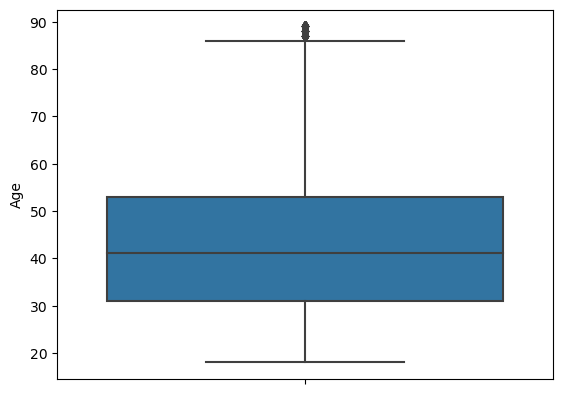

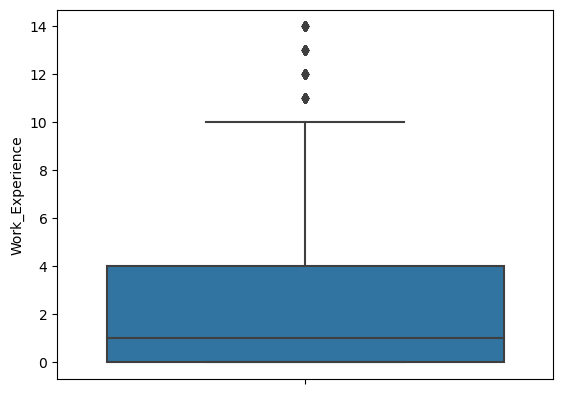

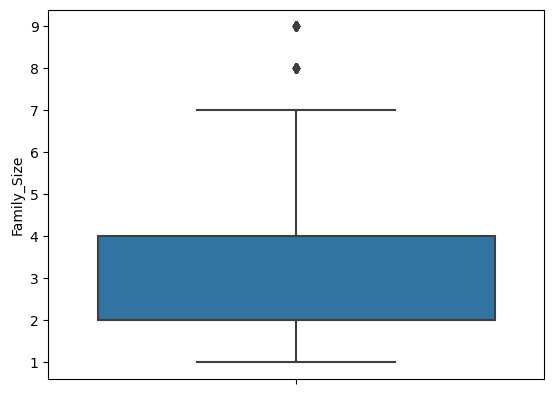

<Figure size 640x480 with 0 Axes>

In [9]:
col=['Age']
co=['Age','Work_Experience','Family_Size']
for i in co:
    print(sns.boxplot(y=df[i]))
    plt.figure()

In [10]:

for i in co:
    q1=df[i].quantile(.25)
    q3=df[i].quantile(.75)
    iqr=q3-q1
    upper_extreme=q3+ (1.5 * iqr)
    lower_extreme=q1- (1.5*iqr)
    df=df[df[i]>= lower_extreme]
    df=df[df[i]<= upper_extreme]

In [11]:
df.shape

(6339, 9)

In [12]:
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,D
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
5,Male,Yes,56,No,Artist,0.0,Average,2.0,C
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0,C
...,...,...,...,...,...,...,...,...,...
8062,Male,Yes,41,Yes,Artist,0.0,High,5.0,B
8064,Male,No,35,No,Executive,3.0,Low,4.0,D
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,B


# DataLebalEncoding

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [14]:
cols=['Gender','Ever_Married','Graduated','Profession','Spending_Score','Segmentation']
for i in cols:
    df[i]=le.fit_transform(df[i])
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,1,0,22,0,5,1.0,2,4.0,3
2,0,1,67,1,2,1.0,2,1.0,1
3,1,1,67,1,7,0.0,1,2.0,1
5,1,1,56,0,0,0.0,0,2.0,2
6,1,0,32,1,5,1.0,2,3.0,2
...,...,...,...,...,...,...,...,...,...
8062,1,1,41,1,0,0.0,1,5.0,1
8064,1,0,35,0,4,3.0,2,4.0,3
8065,0,0,33,1,5,1.0,2,1.0,3
8066,0,0,27,1,5,1.0,2,4.0,1


In [15]:
df['Segmentation'].values

array([3, 1, 1, ..., 3, 1, 1])

# TrainTestSplit

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [18]:
x.shape

(6339, 8)

In [19]:
y.shape

(6339,)

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=.20,random_state=84)

In [22]:
X_train.shape,Y_train.shape

((5071, 8), (5071,))

In [23]:
X_test.shape,Y_test.shape

((1268, 8), (1268,))

# Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [25]:
X_train=sc.fit_transform(X_train)

In [26]:
X_test=sc.transform(X_test)

In [27]:
X_train

array([[ 0.89844246,  0.82849164, -1.01779116, ...,  2.16304054,
         0.76656987,  0.85823578],
       [ 0.89844246,  0.82849164, -0.89285848, ..., -0.12737052,
        -1.56813032, -0.57290978],
       [ 0.89844246, -1.20701278, -0.7679258 , ...,  2.16304054,
         0.76656987,  0.142663  ],
       ...,
       [-1.11303733,  0.82849164,  0.85619908, ..., -0.78177368,
         0.76656987, -1.28848256],
       [-1.11303733,  0.82849164, -0.95532482, ..., -0.4545721 ,
        -1.56813032, -0.57290978],
       [-1.11303733,  0.82849164, -0.51806043, ..., -0.78177368,
        -1.56813032, -0.57290978]])

In [28]:
X_test

array([[-1.11303733,  0.82849164,  0.294002  , ..., -0.78177368,
        -0.40078023, -0.57290978],
       [ 0.89844246,  0.82849164, -0.08079604, ...,  2.16304054,
         0.76656987,  0.142663  ],
       [ 0.89844246, -1.20701278, -1.33012287, ..., -0.78177368,
         0.76656987,  1.57380856],
       ...,
       [-1.11303733,  0.82849164, -0.51806043, ..., -0.78177368,
        -1.56813032,  0.142663  ],
       [-1.11303733, -1.20701278, -0.83039214, ..., -0.78177368,
         0.76656987,  1.57380856],
       [-1.11303733,  0.82849164,  2.48032395, ..., -0.4545721 ,
         0.76656987, -1.28848256]])

# LinearRegressionModel

In [29]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [30]:
reg.fit(X_train,Y_train)

LinearRegression()

In [31]:
reg.coef_

array([ 0.04033841, -0.13508328, -0.15492345, -0.03109228,  0.2086314 ,
       -0.00025788, -0.06757648,  0.13227797])

In [32]:
reg.intercept_

1.5509761388286334

In [33]:
Y_pred=reg.predict(X_test)

In [34]:
Y_pred

array([1.22209164, 1.44090362, 2.34991346, ..., 1.35448659, 1.79285117,
       1.12713604])

# Evaluation

In [35]:
from sklearn import metrics

In [36]:
metrics.mean_squared_error(Y_test,Y_pred)

1.0664531352634157

In [37]:
np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))

1.03269217836847

In [38]:
r2=metrics.r2_score(Y_test,Y_pred)
r2

0.1320711536612833

In [39]:
n=df.shape[0]
p=df.shape[1]

In [40]:
Adj_r2=1-(1-r2)*(n-1)/(n-p-1)
Adj_r2

0.13083693662588303

# LogisticRegressionModel

In [41]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [42]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [43]:
lr.score(X_test, Y_test)

0.5031545741324921

In [44]:
lr_Y_pred=lr.predict(X_test)

In [45]:
lr_Y_pred

array([2, 3, 3, ..., 2, 2, 1])

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
mat = confusion_matrix(Y_test,lr_Y_pred)

In [48]:
mat

array([[149,  25,  60,  67],
       [ 98,  47, 136,  36],
       [ 49,  31, 208,  42],
       [ 53,  12,  21, 234]], dtype=int64)

<Axes: >

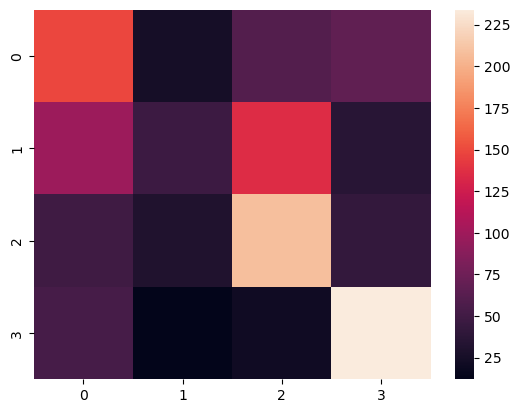

In [49]:
sns.heatmap(mat)

# Evaluation

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,lr_Y_pred)

0.5031545741324921

In [51]:
from sklearn.metrics import classification_report

y_true = []
y_pred = []

for gt in range(len(mat)):
    for pred in range(len(mat)):
        y_true += [gt] * mat[gt][pred]
        y_pred += [pred] * mat[gt][pred]

print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.43      0.50      0.46       301
           1       0.41      0.15      0.22       317
           2       0.49      0.63      0.55       330
           3       0.62      0.73      0.67       320

    accuracy                           0.50      1268
   macro avg       0.49      0.50      0.47      1268
weighted avg       0.49      0.50      0.48      1268

